### Programming Exercise 6: Support Vector Machines

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.io 
import scipy.misc 

from sklearn.svm import SVC #jippie, first time using the sklearn library.

#sigmoid will be vectorized

In [2]:
data = 'data/ex6data1.mat'
mat = scipy.io.loadmat(data)

X, Y= mat['X'], mat['y']

In [3]:
Y=Y.flatten()
X=X.reshape(-2,2) #clf gave depreciationerror without this transformation

In [4]:
def plot(X,Y, show=True):
     
    data_frame=pd.DataFrame(X)  
    data_frame['y']=Y
    
    X_df_pos=data_frame[data_frame.y==1]
    X_df_neg=data_frame[data_frame.y==0]
        
    plt.scatter(X_df_pos[0], X_df_pos[1], label='positive', color='blue')
    plt.scatter(X_df_neg[0], X_df_neg[1], label='negative', color='red')
    
    if show==True:
        plt.legend()        
    
        plt.show()
    
   

In [5]:
plot(X,Y)

In [6]:
clf=SVC(kernel='linear',verbose=True)

In [7]:
clf.fit(X,Y)

[LibSVM]

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=True)

In [8]:
clf.predict([2,2])[0]

/Users/gk/anaconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


0

"So when passing
your training data to the SVM software, there is no need to add this extra
feature x0 = 1 yourself. "-pdf

In [9]:
def plot_decision_boundary(X,Y,x=np.arange(-1, 5, 0.1),y=np.arange(1, 5, 0.1)):
    
    #assuming clf is global
    
    #little lazy since i know the relevant ranges..  
    
    #xx,yy=np.meshgrid(x,y)
    
    x_values=[]
    y_values=[]
    
    for i in x:
        for j in y:
            #
            if clf.predict(np.array([i,j]).reshape(-2,2))[0]==1:
                #ugly argument due to depreciationwarning
                x_values.append(i)
                y_values.append(j)
     
    #import pdb;pdb.set_trace()
    plot(X,Y, show=False)
    plt.plot(x_values, y_values, label='decision boundary') 
    plt.legend(bbox_to_anchor=(2, 1))
    plt.show()

In [10]:
plot_decision_boundary(X,Y)

In [11]:
def plot_decision_boundary2(X,Y,x=np.arange(-1, 5, 0.1),y=np.arange(1, 5, 0.1)):
    
    
    xx,yy=np.meshgrid(x,y)
    #import pdb;pdb.set_trace()
    zz=clf.predict(np.c_[xx.ravel(), yy.ravel()])
    
    zz = zz.reshape(xx.shape)
    #import pdb;pdb.set_trace()
    
    plot(X,Y, show=False)
    plt.contour(xx,yy,zz,[0], label='decision boundary')
    
    plt.legend(bbox_to_anchor=(2, 1))
    plt.show()
    

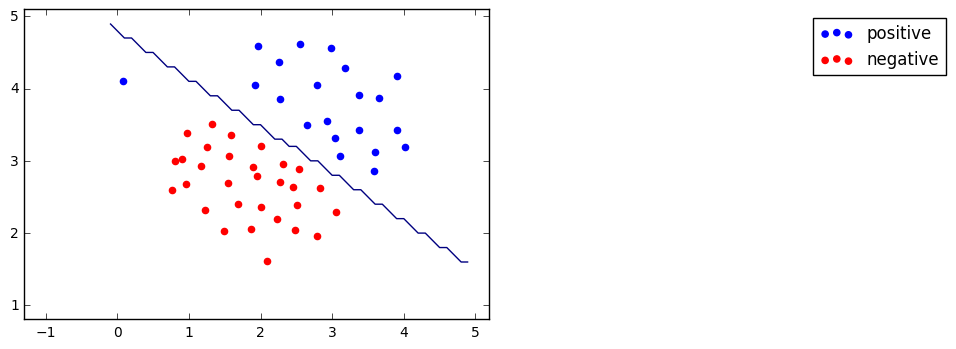

In [12]:
plot_decision_boundary2(X,Y)

In [13]:
clf=SVC(kernel='linear',verbose=True, C=100)

In [14]:
clf.fit(X,Y)

[LibSVM]

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=True)

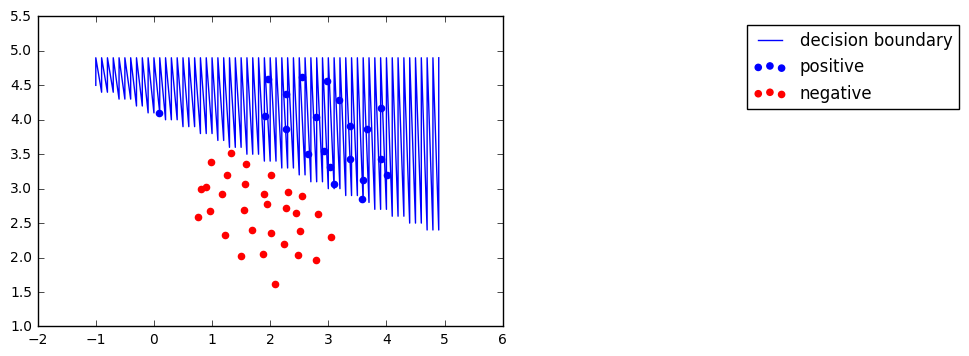

In [15]:
plot_decision_boundary(X,Y)

In [16]:
plot_decision_boundary2(X,Y)

#### 1.2 SVM with Gaussian Kernels


In [17]:

def gaussian_kernel(sigma):
    #this type of nested function is needed in order to call SVC properly.
    
    def inner_function(l,x):
        norm_squared=np.dot(l-x,(l-x).T)
        denom=float(2*(sigma**2))
        return np.exp(-norm_squared/denom)
    
    return inner_function

In [18]:
gaussian_kernel_2=gaussian_kernel(2)

In [19]:
gaussian_kernel_2(np.array([1,2,1]), np.array([0,4,-1]))

0.32465246735834974

"you should expect
to see a value of 0.324652." -pdf

### 1.2.2 Example Dataset 2

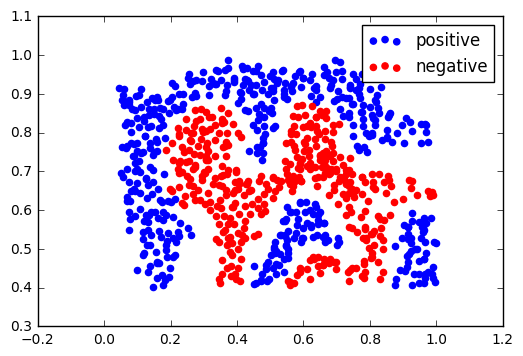

In [20]:
data = 'data/ex6data2.mat'
mat = scipy.io.loadmat(data)

X, Y= mat['X'], mat['y']

Y=Y.flatten()
X=X.reshape(-2,2)

plot(X,Y)

In [21]:
#get some strange error when i use this. will use the built in one instead.
#gaussian_kernel_01=gaussian_kernel(sigma=0.1)
#clf=SVC(C=1,kernel=gaussian_kernel_01,verbose=True)

In [22]:
sigma = 0.1
gamma = np.power(sigma,-2.)
clf=SVC(C=1, kernel='rbf', gamma=gamma)

In [23]:
clf.fit(X,Y)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=99.999999999999986,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [24]:
x=np.arange(-0.2,1.2,0.01)
y=np.arange(0.3,1.1,0.01)
plot_decision_boundary2(X,Y,x,y)

### 1.2.3 Example Dataset 3

In [25]:
data = 'data/ex6data3.mat'
mat = scipy.io.loadmat(data)

X, Y, X_val, Y_val= mat['X'], mat['y'], mat['Xval'], mat['yval']

Y=Y.flatten()
Y_val=Y_val.flatten()
#X=X.reshape(-2,2)

In [26]:
plot(X,Y)


#train clf on training set with 

For both C and Ïƒ, we
suggest trying values in multiplicative steps (e.g., 0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30).

evaluate on cross-validation set, and choose the best one according to some metric. i
ll use score (that is the built in one with sklearn) that Returns the mean accuracy on the given test data and labels.

In [27]:
C=np.array([0.01,0.03,0.1,0.3,1,3,10,30])
sigma=np.array([0.01,0.03,0.1,0.3,1,3,10,30])

In [36]:
def trainer(X,Y,X_val,Y_val,C,sigma):
    score_max=0
    for c in C:
        for s in sigma:
            
            gamma = np.power(s,-2.)
            clf=SVC(C=c, kernel='rbf', gamma=gamma)
            clf.fit(X,Y)
            score=clf.score(X_val,Y_val)
            
            print("C={c} and sigma={s} returned a score of {score} ".format(c=c,s=s,score=score))
            
            if score >score_max:
                score_max=score
                c_max=c
                s_max=s
                
    
    print('best score')
    print(score_max,c_max,s_max)
    
    
    
   
    
    return score_max,c_max,s_max
    
    
    

In [37]:
score_max,c_max,s_max=trainer(X,Y,X_val,Y_val,C,sigma)

C=0.01 and sigma=0.01 returned a score of 0.435 
C=0.01 and sigma=0.03 returned a score of 0.435 
C=0.01 and sigma=0.1 returned a score of 0.435 
C=0.01 and sigma=0.3 returned a score of 0.435 
C=0.01 and sigma=1.0 returned a score of 0.435 
C=0.01 and sigma=3.0 returned a score of 0.435 
C=0.01 and sigma=10.0 returned a score of 0.435 
C=0.01 and sigma=30.0 returned a score of 0.435 
C=0.03 and sigma=0.01 returned a score of 0.435 
C=0.03 and sigma=0.03 returned a score of 0.435 
C=0.03 and sigma=0.1 returned a score of 0.435 
C=0.03 and sigma=0.3 returned a score of 0.9 
C=0.03 and sigma=1.0 returned a score of 0.795 
C=0.03 and sigma=3.0 returned a score of 0.435 
C=0.03 and sigma=10.0 returned a score of 0.435 
C=0.03 and sigma=30.0 returned a score of 0.435 
C=0.1 and sigma=0.01 returned a score of 0.435 
C=0.1 and sigma=0.03 returned a score of 0.435 
C=0.1 and sigma=0.1 returned a score of 0.86 
C=0.1 and sigma=0.3 returned a score of 0.93 
C=0.1 and sigma=1.0 returned a score o

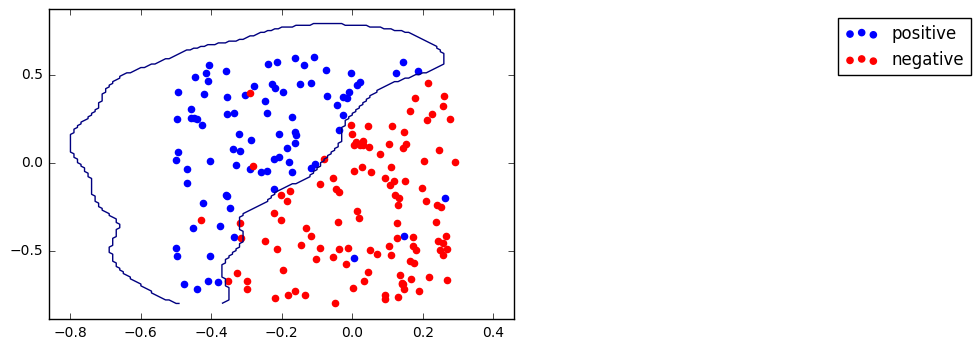

In [38]:
gamma_max=np.power(s_max,-2.)
clf=SVC(C=c_max, kernel='rbf',gamma=gamma)
clf.fit(X,Y)
score=clf.score(X_val,Y_val)
x=np.arange(-0.8,0.4,0.01)
y=np.arange(-0.8,0.8,0.01)
plot_decision_boundary2(X_val,Y_val,x,y)